In [1]:
# import ipy_autoreload
%reload_ext autoreload
%autoreload 2
%aimport isochrone
from isochrone import *

import os
import geopandas as gpd
import numpy as np
import pandas as pd
import osmnx as ox
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, LineString, Polygon
from shapely.prepared import prep
import alphashape
import cartopy.crs as ccrs

import lonboard
from lonboard.colormap import apply_categorical_cmap

In [2]:
city = 'Cambridge'

In [20]:
gdf_nodes, all_lts, G_lts = load_files(city)

In [31]:
G1, G2, G3, G4, G1b, G2b, G3b, G4b = lts_map_graphs(G_lts, all_lts, gdf_nodes)

In [38]:
# Find independent/disconnected grpahs
# Use to find areas to fix in OSM and filter out from heatmap
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.weakly_connected_components.html#networkx.algorithms.components.weakly_connected_components

graphSizes = [len(c) for c in sorted(nx.weakly_connected_components(G4), key=len, reverse=True)]
isolates = list(nx.isolates(G4))

# largest_cc = max(nx.weakly_connected_components(G_lts), key=len)
# S = [G4.subgraph(c).copy() for c in nx.weakly_connected_components(G4)]
# S0 = S[0]

279 grid points in boundary region.


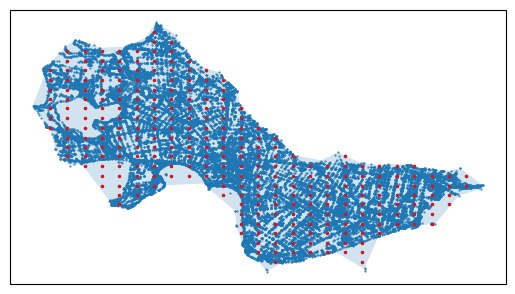

In [7]:
alpha_shape = boundry_polygon(gdf_nodes, 200)
valid_points = grid_points(alpha_shape, 25)
plot_grid_boundary(gdf_nodes, alpha_shape, valid_points)

In [33]:
travel_speed = 15 #biking speed in km/hour

G1b, G2b, G3b, G4b = edge_travel_times(travel_speed, G1b, G2b, G3b, G4b)

LTS 4: 27141 nodes
LTS 3: 23062 nodes
LTS 2: 113 nodes
LTS 1: 110 nodes


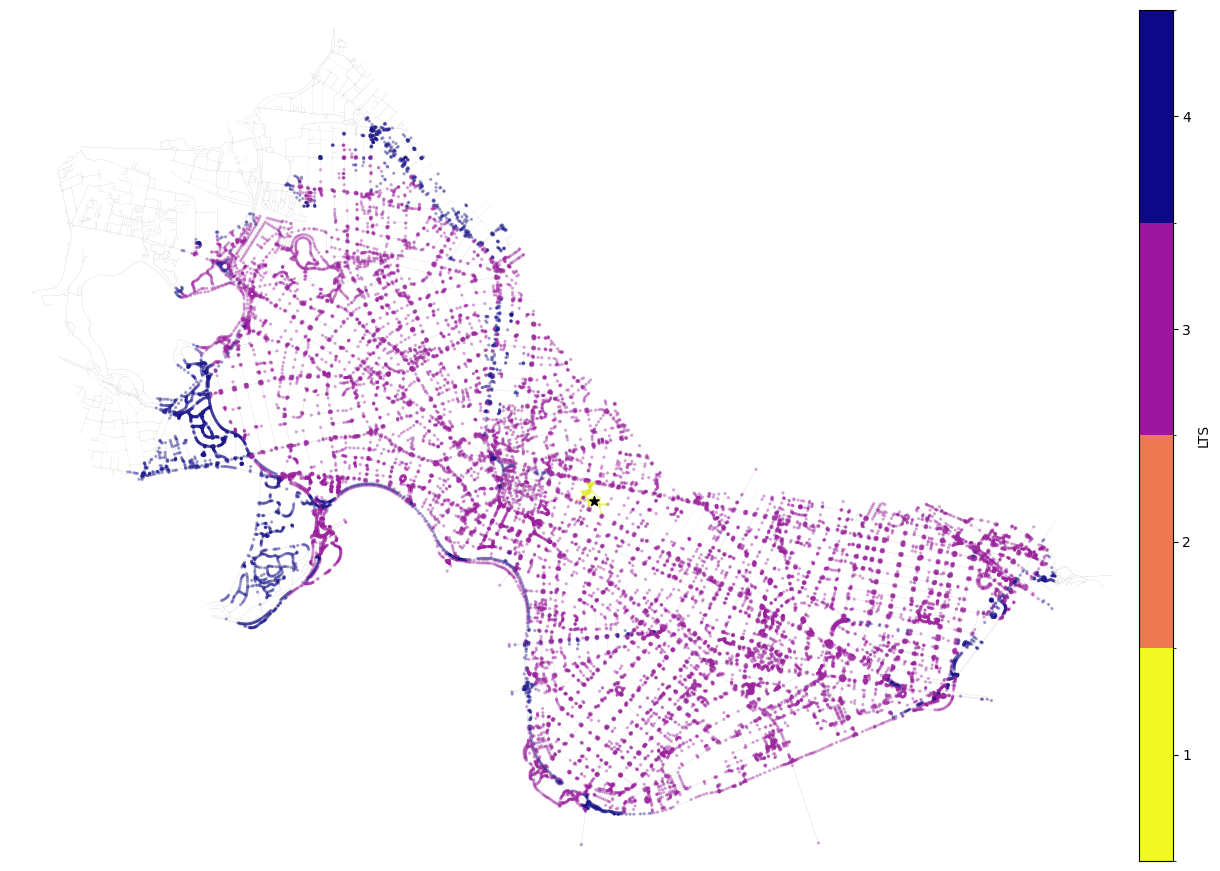

In [34]:
trip_time = 15 # minutes

# point to start isochrone plot from
y = 42.373696
x = -71.110564

point, nodeID = nearest_node(x, y, G1)

node_colors, node_count = point_isochrone(nodeID, trip_time, G1b, G2b, G3b, G4b)

point_isochrone_plot(city, point, node_colors, trip_time, G4b)

In [35]:
nodeIsochroneSummary = []
for i, pt in enumerate(valid_points):
    print(f'\nPoint {i} at {pt.y}, {pt.x}')
    point, nodeID = nearest_node(pt.x, pt.y, G1)
    _, nodeCount = point_isochrone(nodeID, trip_time, G1b, G2b, G3b, G4b)
    nodeIsochroneSummary.append([point, nodeID] + nodeCount)

nodeIsochroneSummarydf = pd.DataFrame(nodeIsochroneSummary, columns=['point_node', 'node_id', 'LTS4', 'LTS3', 'LTS2', 'LTS1'])
nodeIsochroneSummarydf['point_grid'] = valid_points


Point 0 at 42.3819, 42.3819
LTS 4: 13468 nodes
LTS 3: 8549 nodes
LTS 2: 1739 nodes
LTS 1: 1298 nodes

Point 1 at 42.3839, 42.3839
LTS 4: 12733 nodes
LTS 3: 8904 nodes
LTS 2: 1739 nodes
LTS 1: 1298 nodes

Point 2 at 42.386, 42.386
LTS 4: 13398 nodes
LTS 3: 9848 nodes
LTS 2: 1739 nodes
LTS 1: 1298 nodes

Point 3 at 42.388, 42.388
LTS 4: 12830 nodes
LTS 3: 9524 nodes
LTS 2: 1739 nodes
LTS 1: 1298 nodes

Point 4 at 42.39, 42.39
LTS 4: 1 nodes
LTS 3: 1 nodes
LTS 2: 1 nodes
LTS 1: 1 nodes

Point 5 at 42.3921, 42.3921
LTS 4: 12490 nodes
LTS 3: 10301 nodes
LTS 2: 44 nodes
LTS 1: 15 nodes

Point 6 at 42.3941, 42.3941
LTS 4: 1 nodes
LTS 3: 1 nodes
LTS 2: 1 nodes
LTS 1: 1 nodes

Point 7 at 42.3758, 42.3758
LTS 4: 17661 nodes
LTS 3: 9801 nodes
LTS 2: 1745 nodes
LTS 1: 3 nodes

Point 8 at 42.3778, 42.3778
LTS 4: 14378 nodes
LTS 3: 8481 nodes
LTS 2: 1739 nodes
LTS 1: 7 nodes

Point 9 at 42.3798, 42.3798
LTS 4: 15286 nodes
LTS 3: 9373 nodes
LTS 2: 3 nodes
LTS 1: 3 nodes

Point 10 at 42.3819, 42.3819

,point_node,node_id,LTS4,LTS3,LTS2,LTS1,point_grid
0,POINT (-71.1567685 42.3819787),2095738603,13468,8549,1739,1298,POINT (-71.1569 42.3819)
1,POINT (-71.156956 42.383886),7632421429,12733,8904,1739,1298,POINT (-71.1569 42.3839)
2,POINT (-71.1572161 42.3860183),7632421515,13398,9848,1739,1298,POINT (-71.1569 42.386)
3,POINT (-71.1563387 42.387688),7632421523,12830,9524,1739,1298,POINT (-71.1569 42.388)
4,POINT (-71.1571281 42.390151),3480361406,1,1,1,1,POINT (-71.1569 42.39)


In [65]:
# nodeIsochroneSummarydf.sort_values(by=['LTS4'], ascending=True).head(15)
nodeIsochroneSummarydf.sort_values(by=['LTS2'], ascending=False).head(15)

,point_node,node_id,LTS4,LTS3,LTS2,LTS1,point_grid
7,POINT (-71.1509969 42.3748314),61324895,17661,9801,1745,3,POINT (-71.1532 42.3758)
0,POINT (-71.1567685 42.3819787),2095738603,13468,8549,1739,1298,POINT (-71.1569 42.3819)
28,POINT (-71.1506899 42.3901222),8726778575,16295,11922,1739,1298,POINT (-71.1495 42.3921)
21,POINT (-71.1493103 42.3770411),61329011,17566,10881,1739,1,POINT (-71.1495 42.3778)
22,POINT (-71.149463 42.379696),61325297,17887,11555,1739,1298,POINT (-71.1495 42.3798)
23,POINT (-71.150567 42.381003),61325025,17209,10975,1739,1298,POINT (-71.1495 42.3819)
24,POINT (-71.1474163 42.3834562),9775832169,17665,13142,1739,1298,POINT (-71.1495 42.3839)
25,POINT (-71.1480912 42.3869652),61325110,17307,12884,1739,1298,POINT (-71.1495 42.386)
55,POINT (-71.1432768 42.3826878),552623581,18295,14107,1739,1298,POINT (-71.1422 42.3819)
27,POINT (-71.1495935 42.3897667),1418837948,16067,11733,1739,1298,POINT (-71.1495 42.39)


In [61]:
gs = gpd.GeoSeries(nodeIsochroneSummarydf['point_node'])

nodeIsochroneSummaryGDF = gpd.GeoDataFrame(nodeIsochroneSummarydf, geometry=gs, crs='wgs84')

nis1 = gpd.GeoDataFrame(nodeIsochroneSummarydf['LTS1'], geometry=gs, crs='wgs84')
nis2 = gpd.GeoDataFrame(nodeIsochroneSummarydf['LTS2'], geometry=gs, crs='wgs84')
nis3 = gpd.GeoDataFrame(nodeIsochroneSummarydf['LTS3'], geometry=gs, crs='wgs84')
nis4 = gpd.GeoDataFrame(nodeIsochroneSummarydf['LTS4'], geometry=gs, crs='wgs84')

nodeIsochroneSummaryGDF

,point_node,node_id,LTS4,LTS3,LTS2,LTS1,point_grid,geometry
0,POINT (-71.1567685 42.3819787),2095738603,13468,8549,1739,1298,POINT (-71.1569 42.3819),POINT (-71.15677 42.38198)
1,POINT (-71.156956 42.383886),7632421429,12733,8904,1739,1298,POINT (-71.1569 42.3839),POINT (-71.15696 42.38389)
2,POINT (-71.1572161 42.3860183),7632421515,13398,9848,1739,1298,POINT (-71.1569 42.386),POINT (-71.15722 42.38602)
3,POINT (-71.1563387 42.387688),7632421523,12830,9524,1739,1298,POINT (-71.1569 42.388),POINT (-71.15634 42.38769)
4,POINT (-71.1571281 42.390151),3480361406,1,1,1,1,POINT (-71.1569 42.39),POINT (-71.15713 42.39015)
...,...,...,...,...,...,...,...,...
274,POINT (-71.071588 42.3683058),7745736208,11809,10995,455,5,POINT (-71.0721 42.3676),POINT (-71.07159 42.36831)
275,POINT (-71.0718106 42.3693537),6755418753,11876,10976,455,2,POINT (-71.0721 42.3696),POINT (-71.07181 42.36935)
276,POINT (-71.0722423 42.3714233),7875917602,11822,11110,536,203,POINT (-71.0721 42.3717),POINT (-71.07224 42.37142)
277,POINT (-71.0683842 42.3695223),1833452860,10427,9801,455,338,POINT (-71.0684 42.3696),POINT (-71.06838 42.36952)


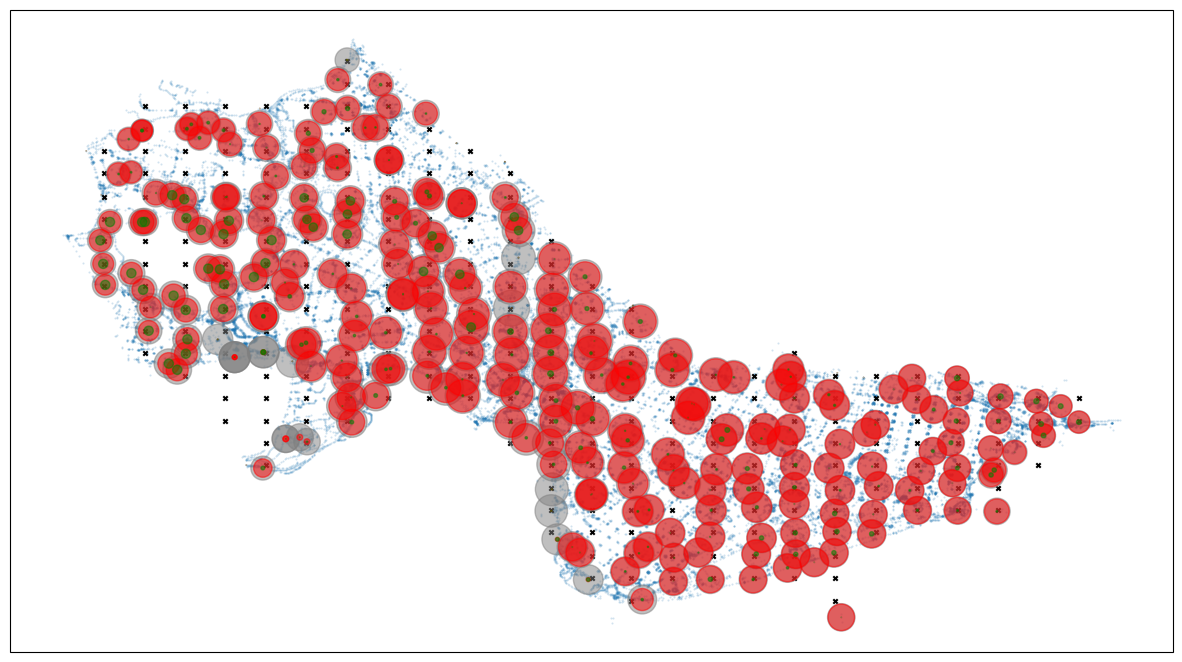

In [36]:
 # Initialize plot
plt.figure(figsize=(15,9))
ax = plt.axes(projection=ccrs.PlateCarree())

 # Plot input points
gdf_proj = gdf_nodes.to_crs(ccrs.Robinson().proj4_init)
ax.scatter([p.x for p in gdf_proj['geometry']],
            [p.y for p in gdf_proj['geometry']],
            transform=ccrs.Robinson(),
            marker='.', s=1, alpha=0.2)

ax.scatter([p.x for p in valid_points],
            [p.y for p in valid_points],
          #   transform=ccrs.Robinson(),
            marker='x', s=10, c='k')

m = 3000

s4 = m * (nodeIsochroneSummarydf['LTS4'] / nodeIsochroneSummarydf['LTS4'].max())
ax.scatter([p.x for p in nodeIsochroneSummarydf['point_node']],
            [p.y for p in nodeIsochroneSummarydf['point_node']],
          #   transform=ccrs.Robinson(),
            marker='.', s=s4, c='grey', alpha=0.5)

s3 = m * (nodeIsochroneSummarydf['LTS3'] / nodeIsochroneSummarydf['LTS4'].max())
ax.scatter([p.x for p in nodeIsochroneSummarydf['point_node']],
            [p.y for p in nodeIsochroneSummarydf['point_node']],
          #   transform=ccrs.Robinson(),
            marker='.', s=s3, c='r', alpha=0.5)

s2 = m * (nodeIsochroneSummarydf['LTS2'] / nodeIsochroneSummarydf['LTS4'].max())
ax.scatter([p.x for p in nodeIsochroneSummarydf['point_node']],
            [p.y for p in nodeIsochroneSummarydf['point_node']],
          #   transform=ccrs.Robinson(),
            marker='.', s=s2, c='g', alpha=0.5)

 # Plot alpha shape
# ax.add_geometries(
#      alpha_shape.to_crs(ccrs.Robinson().proj4_init)['geometry'],
#      crs=ccrs.Robinson(), alpha=.2)

plt.show()

In [69]:
lts = all_lts[all_lts['lts'] > 0]

layer_lts = lonboard.PathLayer.from_geopandas(
    gdf=lts[["geometry", "lts", "name"]], 
    width_scale=2
)
layer_lts.get_color = apply_categorical_cmap(
    values=lts["lts"],
    cmap={
        0: [0, 0, 0],  # black
        1: [0, 128, 0],  # green
        2: [0, 191, 255],  # blue
        3: [255, 165, 0],  # orange
        4: [255, 0, 0],  # red
    },
)

r = 100
norm = nodeIsochroneSummarydf['LTS4'].max()

layer_iso2 = lonboard.ScatterplotLayer.from_geopandas(
    nis2,
    get_fill_color=[0, 0, 255],
    get_radius = r * np.sqrt(nis2['LTS2'] / norm),
    opacity=0.2,
)

layer_iso3 = lonboard.ScatterplotLayer.from_geopandas(
    nis3,
    get_fill_color=[255, 0, 0],
    get_radius = r * np.sqrt(nis3['LTS3'] / norm),
    opacity=0.2,
)

layer_iso4 = lonboard.ScatterplotLayer.from_geopandas(
    nis4,
    get_fill_color=[150, 150, 150],
    get_radius = r * np.sqrt(nis4['LTS4'] / norm),
    opacity=0.2,
)


map = lonboard.Map(layers=[layer_lts, layer_iso4, layer_iso3, layer_iso2],
            #  basemap_style=lonboard.basemap.CartoBasemap.Positron,
                basemap_style=lonboard.basemap.CartoBasemap.DarkMatter,
                _height=700,
                )
map

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…